# Souper-duper predictive model

## Prepare data

In [341]:
import pandas as pd
import os

In [342]:
path = os.path.join('data', 'souper_with_events.csv')
soup = pd.read_csv(path, index_col = 0)
soup.head()

,date,locA,locB,total,month,day_of_week,day_of_month,season,event
0,2018-02-03,30,15,45,February,Saturday,3,Winter,0
1,2018-02-05,30,17,47,February,Monday,5,Winter,0
2,2018-02-24,25,9,34,February,Saturday,24,Winter,0
3,2018-03-03,30,15,45,March,Saturday,3,Spring,0
4,2018-03-05,30,12,42,March,Monday,5,Spring,0


In [343]:
path = os.path.join('data', 'weather_data_complete.csv')
weather = pd.read_csv(path)
weather.head()

,day,month,year,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity
0,3,2,2018,0.1336,0.0190,rain,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83
1,4,2,2018,0.0129,0.0005,rain,7.07,7.05,11.88,7.28,-3.10,-0.07,-1.50,-0.20,-3.27,0.76
2,5,2,2018,0.0000,0.0000,no_precip,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74
3,6,2,2018,0.0000,0.0000,no_precip,5.84,5.86,6.98,5.88,-5.55,-2.78,-4.15,-2.78,-5.11,0.74
4,7,2,2018,0.0000,0.0000,no_precip,3.62,3.65,5.26,3.74,-5.11,-0.01,-2.72,-0.01,-2.83,0.68


In [344]:
weather['date'] = weather['year'].astype(str) + '-' + \
                  weather['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                  weather['day'].astype(str).apply(lambda s: f'{s:0>2}')
weather = weather.drop(['day', 'month', 'year'], axis = 1)
weather.loc[:, 'day_of_year'] = weather.loc[:, 'date'].apply(date2dayofyear)
df = weather.merge(soup, on = 'date')
df.head()

,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,...,date,day_of_year,locA,locB,total,month,day_of_week,day_of_month,season,event
0,0.1336,0.019,rain,3.27,3.25,10.24,4.03,0.18,2.84,1.58,...,2018-02-03,34,30,15,45,February,Saturday,3,Winter,0
1,0.0000,0.000,no_precip,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,...,2018-02-05,36,30,17,47,February,Monday,5,Winter,0
2,0.0000,0.000,no_precip,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,...,2018-02-24,55,25,9,34,February,Saturday,24,Winter,0
3,0.1913,0.014,snow,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,...,2018-03-03,62,30,15,45,March,Saturday,3,Spring,0
4,0.0000,0.000,no_precip,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,...,2018-03-05,64,30,12,42,March,Monday,5,Spring,0


In [345]:
variables = [
    'month',
    'day_of_week',
    'day_of_month',
    'season',
    'precip_intensity_max',
    'precip_intensity_avg',
    'wind_speed_max',
    'wind_speed_avg',
    'gust_max',
    'gust_avg',
    'temp_min',
    'temp_max',
    'temp_avg',
    'temp_day',
    'temp_night',
    'humidity',
    'event'
]

In [346]:
X = df[variables]
y = df['total']
X.head()

,month,day_of_week,day_of_month,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event
0,February,Saturday,3,Winter,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0
1,February,Monday,5,Winter,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0
2,February,Saturday,24,Winter,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0
3,March,Saturday,3,Spring,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0
4,March,Monday,5,Spring,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0


In [347]:
def day2int(day: str):
    ''' Convert a day to an integer. '''
    days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    days = {day: idx for (idx, day) in enumerate(days)}
    return days.get(day.lower())
    
def month2int(month: str):
    ''' Convert a month to an integer. '''
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 
              'august', 'september', 'october', 'november', 'december']
    months = {month: idx for (idx, month) in enumerate(months)}
    return months.get(month.lower())

def season2int(season: str):
    ''' Convert a season to an integer. '''
    seasons = ['winter', 'spring', 'summer', 'autumn']
    seasons = {season: idx for (idx, season) in enumerate(seasons)}
    return seasons.get(season.lower())

def date2dayofyear(date: str):
    ''' Convert at date of the YYYY-MM-DD format
        to the day of the year. '''
    from calendar import monthrange
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    
    day_of_year = 0
    for m in range(1, month):
        day_of_year += monthrange(year, m)[1]
    day_of_year += day
    
    return day_of_year

In [348]:
day2int('Wednesday'), month2int('december'), season2int('AuTUMN'), date2dayofyear('2019-02-05')

(2, 11, 3, 36)

In [349]:
X.loc[:, 'day_of_week'] = X.loc[:, 'day_of_week'].apply(day2int)
X.loc[:, 'month'] = X.loc[:, 'month'].apply(month2int)
X.loc[:, 'season'] = X.loc[:, 'season'].apply(season2int)
X.head()

,month,day_of_week,day_of_month,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event
0,1,5,3,0,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0
1,1,0,5,0,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0
2,1,5,24,0,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0
3,2,5,3,1,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0
4,2,0,5,1,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0


## Data analysis

In [350]:
from matplotlib import pyplot as plt

In [351]:
df = X.copy()
df['total'] = y
df.head()

,month,day_of_week,day_of_month,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total
0,1,5,3,0,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45
1,1,0,5,0,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47
2,1,5,24,0,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34
3,2,5,3,1,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45
4,2,0,5,1,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42


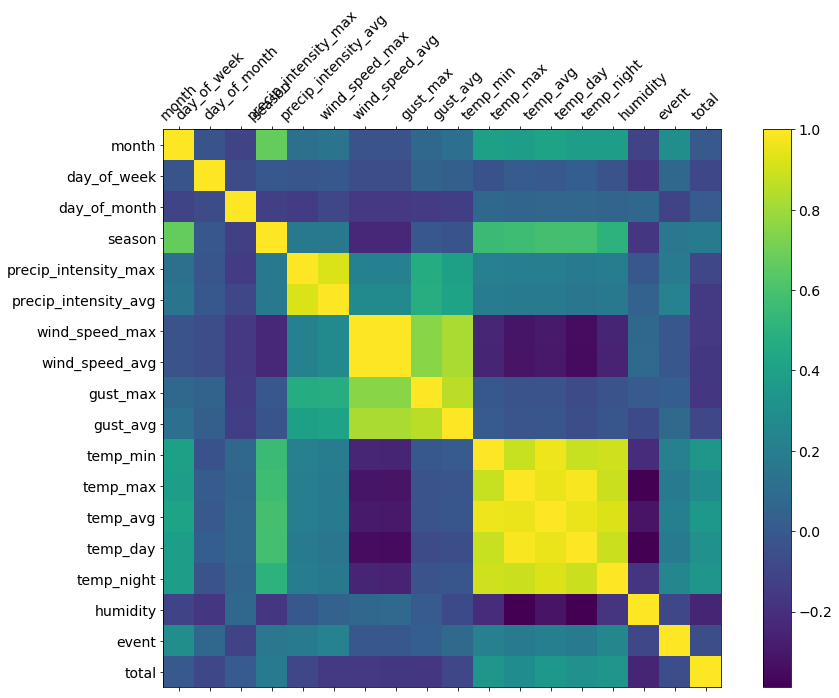

In [353]:
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Model selection

In [354]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, svm, ensemble

### Linear regression

In [355]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [356]:
scores = cross_val_score(linreg, X, y, cv = 10)
-np.mean(scores)

1.6630684475947273

### Ridge regression

In [382]:
ridge = linear_model.Ridge(alpha = 0.2)
ridge.fit(X, y)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [383]:
scores = cross_val_score(ridge, X, y, cv = 10)
-np.mean(scores)

1.6880479977673262

### Support vector machine

In [359]:
sv = svm.SVR(C = 1.0, gamma = 'scale')
sv.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [360]:
scores = cross_val_score(sv, X, y, cv = 10)
-np.mean(scores)

0.5217439737833263

### Random forest

In [375]:
forest = ensemble.RandomForestRegressor(n_estimators = 20)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [376]:
scores = cross_val_score(forest, X, y, cv = 10)
-np.mean(scores)

0.3991756937650551

In [377]:
list(zip(X.columns, forest.feature_importances_))

[('month', 0.08289594031478892),
 ('day_of_week', 0.0585200723723292),
 ('day_of_month', 0.06311627595923419),
 ('season', 0.05377077874174876),
 ('precip_intensity_max', 0.03505498632215999),
 ('precip_intensity_avg', 0.05813793584289488),
 ('wind_speed_max', 0.0298408979707436),
 ('wind_speed_avg', 0.036402177481378147),
 ('gust_max', 0.06540623693830988),
 ('gust_avg', 0.03308978832957453),
 ('temp_min', 0.15297290522114876),
 ('temp_max', 0.03282343669554334),
 ('temp_avg', 0.0726401808639442),
 ('temp_day', 0.061772059441392455),
 ('temp_night', 0.052256811973494396),
 ('humidity', 0.10228435132564033),
 ('event', 0.009015164205674473)]

In [385]:
yhat = forest.predict(X)
